### Import all required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve, precision_score)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

### Load data

In [2]:
path= r"C:\Users\User\Downloads\Loan_Modelling.csv"
loan_m= pd.read_csv(path)
loan_m.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
loan= loan_m.copy()
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Descriptive analysis
- There are no missing values in all the varibales
- The age of customers in the bank ranges from 23 to 67
- The highest year of experience is 43 while the lowest is -3
- The highest earner, earns 224 thousand dollars
- family size ranges from 1 to 4
- The maximum values for mortgage is 635
- The maximum values for CCAvg is 10



In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- They are all numerical variables
- There are 5000 rows and 14 columns 

In [5]:
loan[['ZIPCode','ID', 'Age', 'Experience', 'Family', 'Income', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 
      'Securities_Account', 'CD_Account', 'Online', 'CreditCard']].nunique()

ZIPCode                467
ID                    5000
Age                     45
Experience              47
Family                   4
Income                 162
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

### The unique count of each variable will help to identify the discrete variables
- The discrete variables are family, Education, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard

In [6]:
loan['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- This is an imbalance data
- 4520 indicates number of people that didnt access personal loan
- 480 are number of customers that access personal loan

In [7]:
loan.duplicated().sum()

0

No duplicated variable

## Univariate Analysis
### This is show graphical representation of each variable in the dataset


### Create a function to plot two plots together on a plane

In [8]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

- For continous variable, histogram_boxplot will be adopted.
- For discrete variable, labeled_barplot will be adopted.

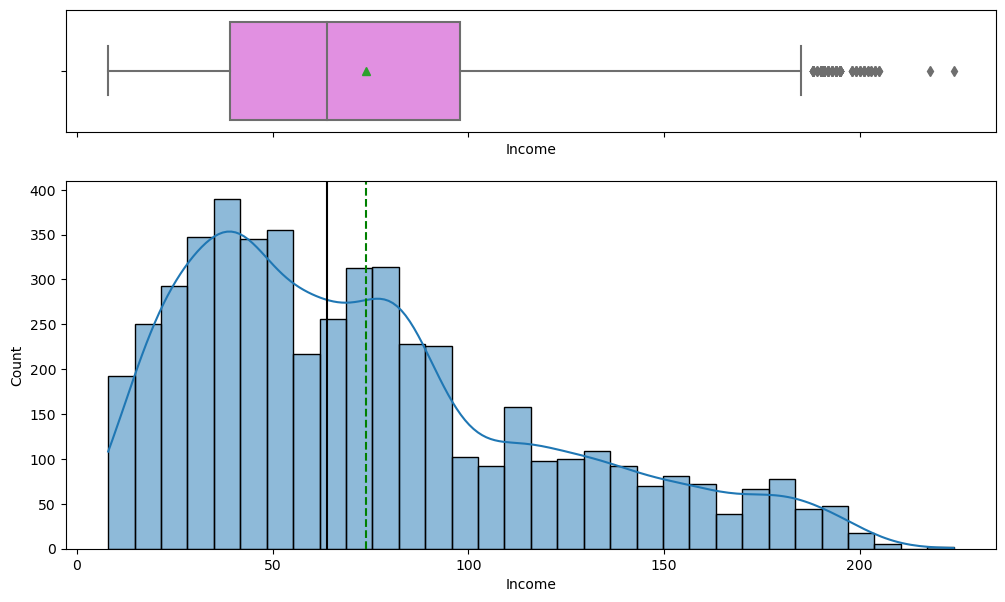

In [9]:
histogram_boxplot(data = loan, feature = "Income")

- There are outliers in the data set
- The distribution is right skewed, the mean is greater than the median

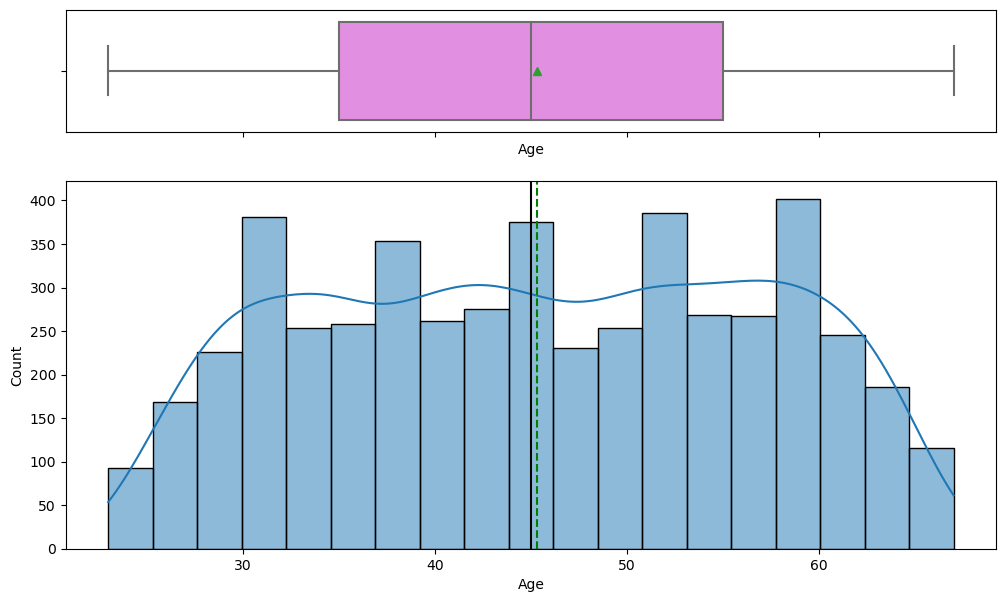

In [10]:
histogram_boxplot(data = loan, feature = "Age")

- This is a normal distribution as the mean and median has almost the same value
- There is no outliers

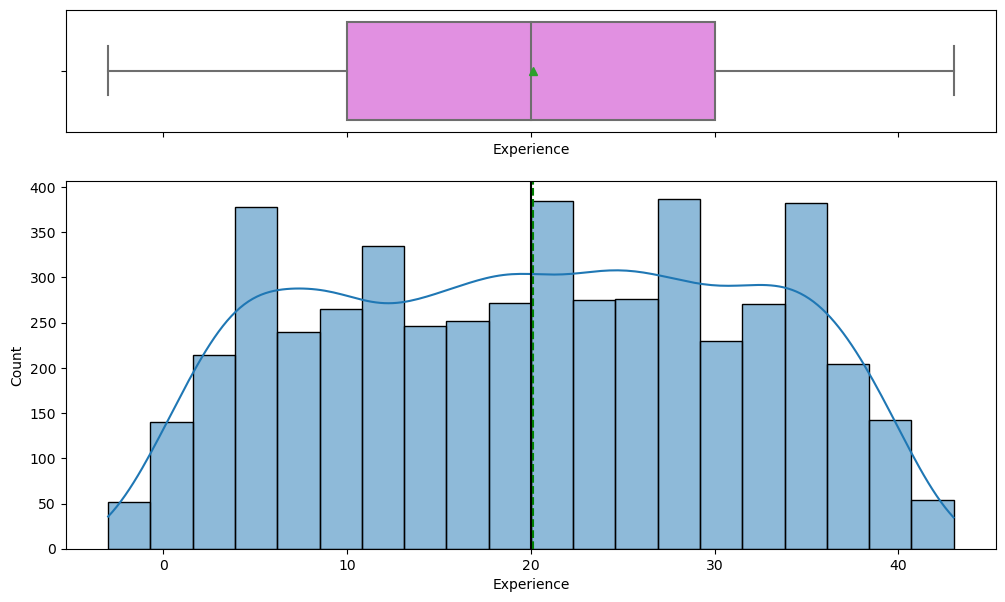

In [11]:
histogram_boxplot(data = loan, feature = "Experience")

- There is no outliers
- This is a normal distribution

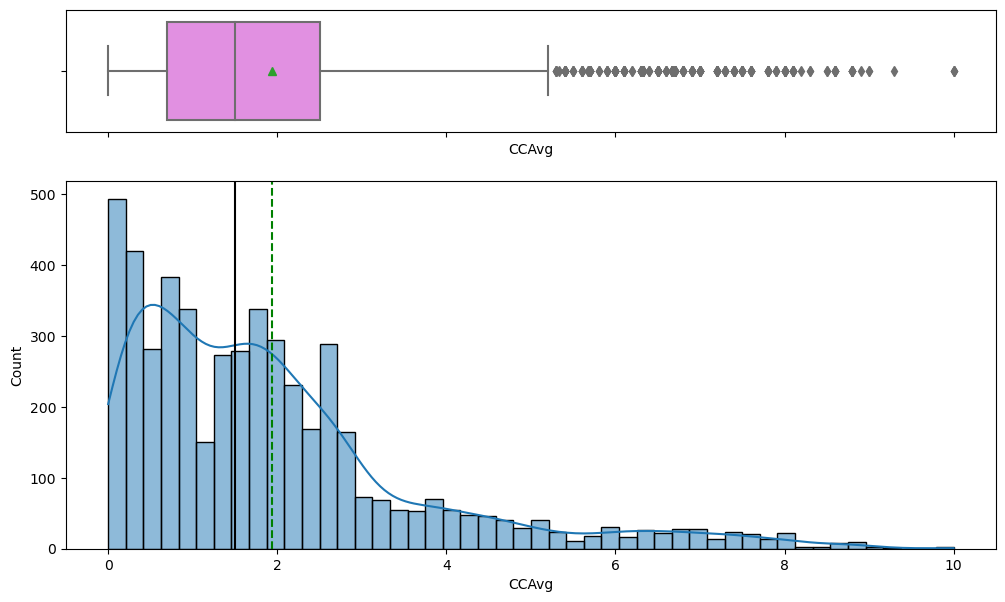

In [12]:
histogram_boxplot(data = loan, feature = "CCAvg")

- This is a right skewed distribution, the mean is greater than the median
- There are outliers

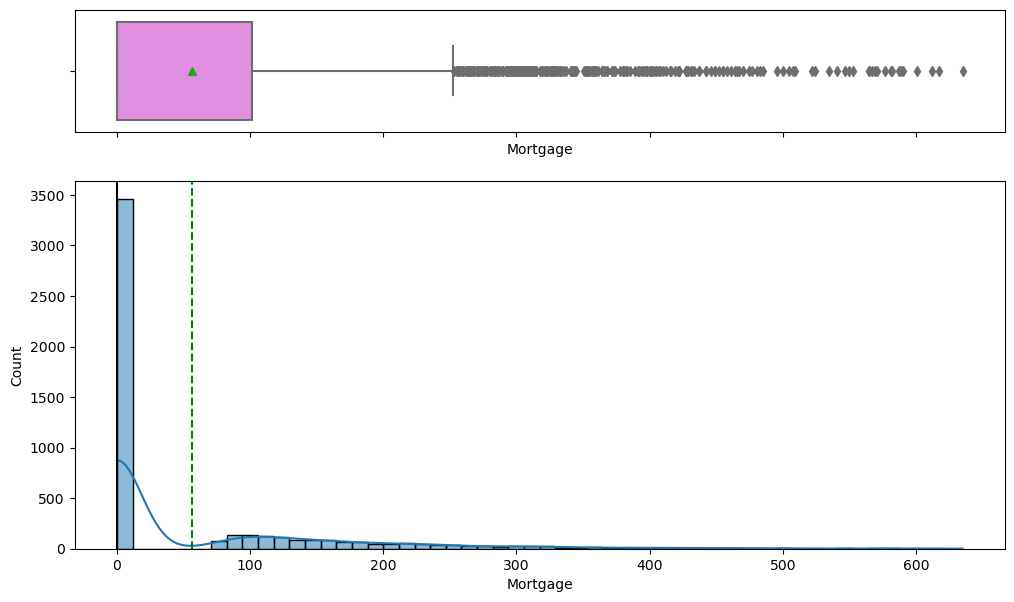

In [13]:
histogram_boxplot(data = loan, feature = "Mortgage")

- There are outliers
- The distribution is a right skewed distribution as the mean is greater than the median

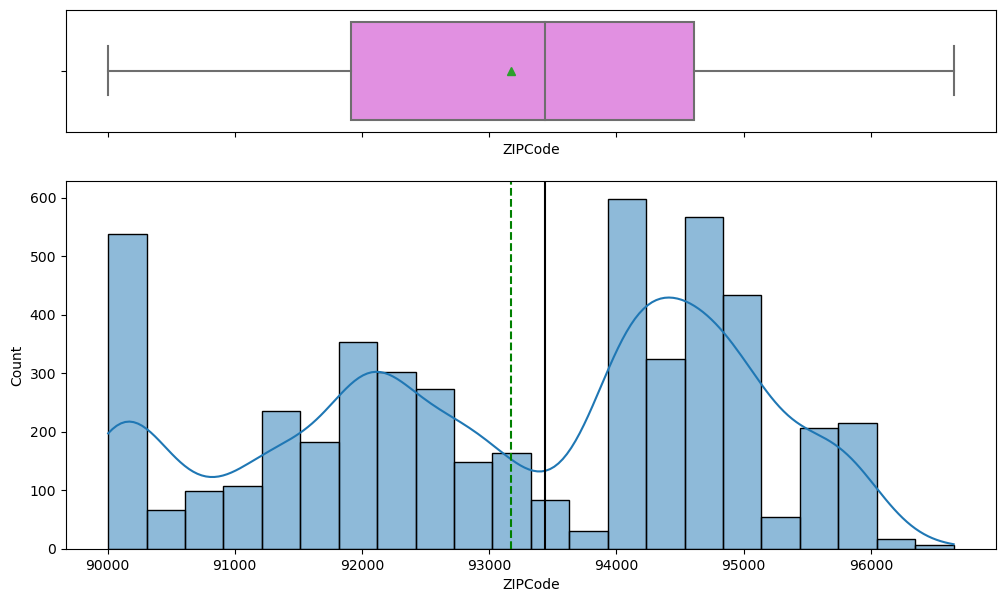

In [14]:
histogram_boxplot(data = loan, feature = "ZIPCode")

- The distribution is slightly left skewed, the median is slightly greater than the mean
- There are no outliers

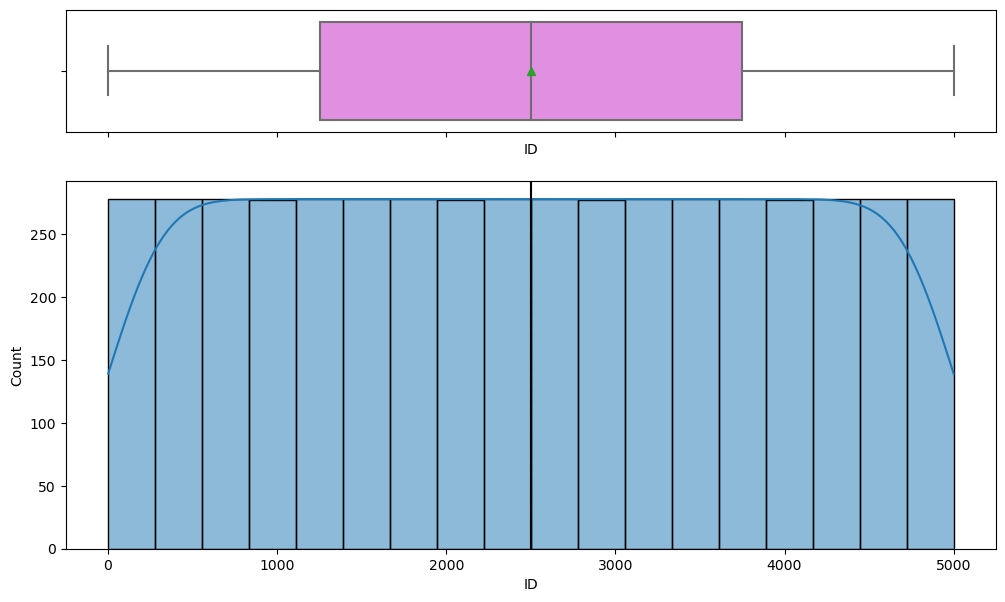

In [15]:
histogram_boxplot(data = loan, feature = "ID")

- The distribution is a normal distribution, the mean is equal to the median
- There are no outliers

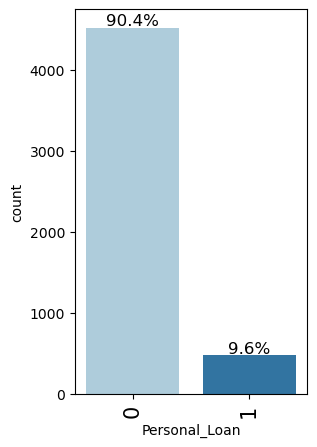

In [16]:
labeled_barplot(data = loan, feature = "Personal_Loan", perc = True)

- 90.4% of the data did not take a personal loan while 9.6% did take a loan

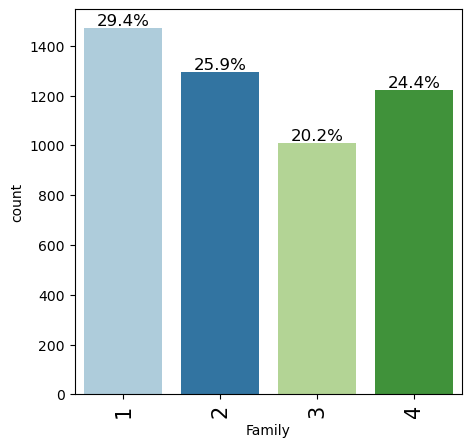

In [17]:
labeled_barplot(data = loan, feature = "Family", perc = True)

- A family of 1 has 29.4% of the customer base which is the highest
- The lowest of the customer base are family of 3 with 20.2% of the data

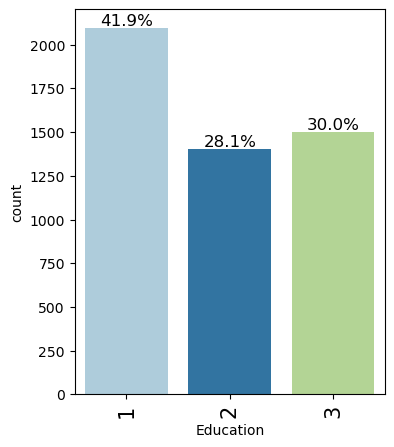

In [18]:
labeled_barplot(data = loan, feature = "Education", perc = True)

- The highest customer base in terms of education are the undergraduates with 41.9% of the data
- Graduates took the lowest percentage of the customer base

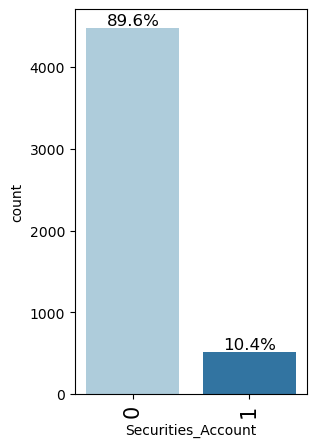

In [19]:
labeled_barplot(data = loan, feature = "Securities_Account", perc = True)

- Customers with securities account are 10.4% of the customer base

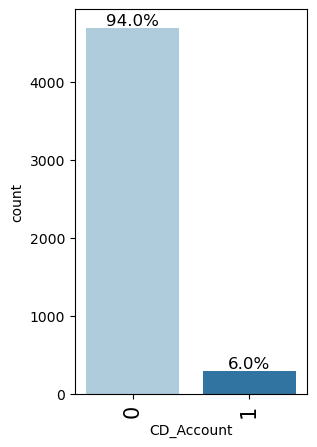

In [20]:
labeled_barplot(data = loan, feature = "CD_Account", perc = True)

- The customers that have certificate of deposit in the bank are 6% of the customer base

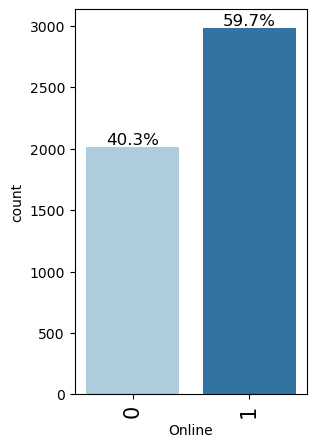

In [21]:
labeled_barplot(data = loan, feature = "Online", perc = True)

- Customers with internet banking facilities are more that those without it.

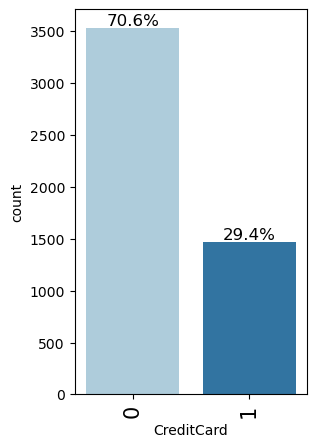

In [22]:
labeled_barplot(data = loan, feature = "CreditCard", perc = True)

- 29.4% of the customer base has credit card

## Bivariate Analysis
- Bivariate analysis give the relationship between two variables.
- I will adopt this to get insight on the independent variables and the target variable majorly.

<AxesSubplot:>

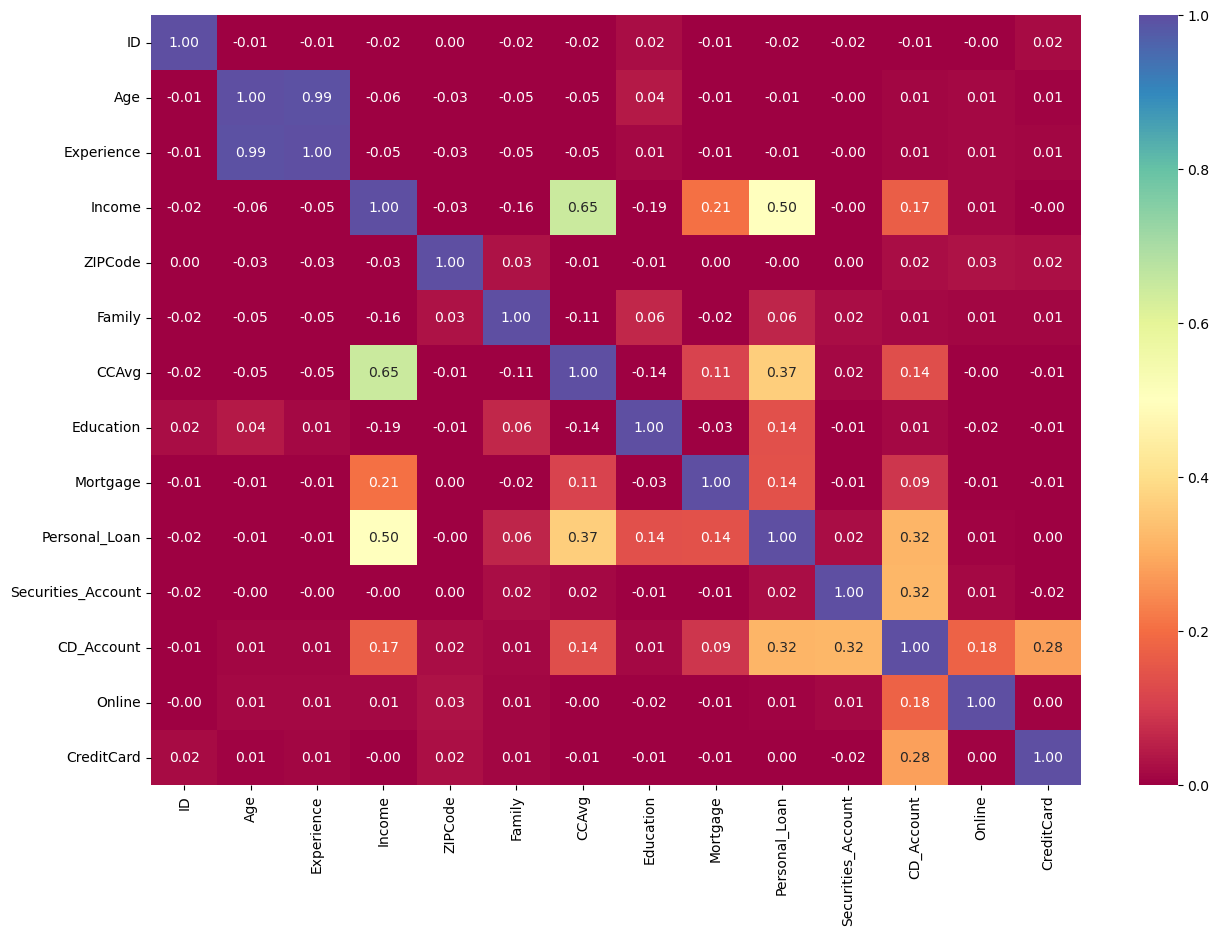

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(loan.corr(), annot=True, vmin=0, vmax=1, fmt='.2f', cmap='Spectral')

### Correlation with the target variable
- Income has a moderate correlation with the dependent variable 'Personal loan'
- CD_Account and CCAvg has a low correlation with the target variable
- Education and mortgage has a very low correlation with the dependent variable
### General correlation
- CCAvg has the highest correlation with income in the dataset

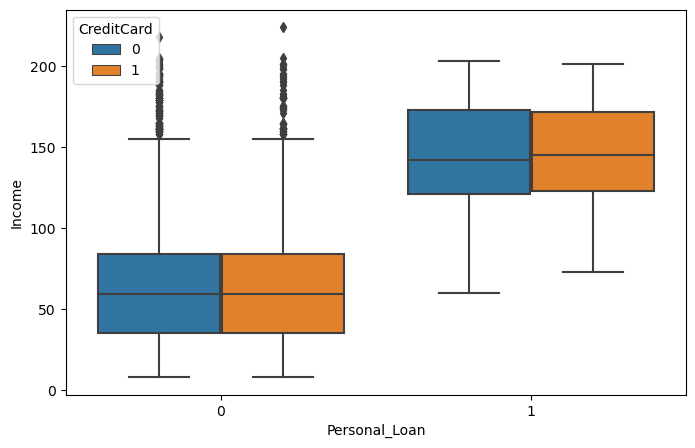

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(y="Income", x="Personal_Loan", data=loan, hue='CreditCard')
plt.show()

- Customers that took personal loan with or without credit card has the highest income

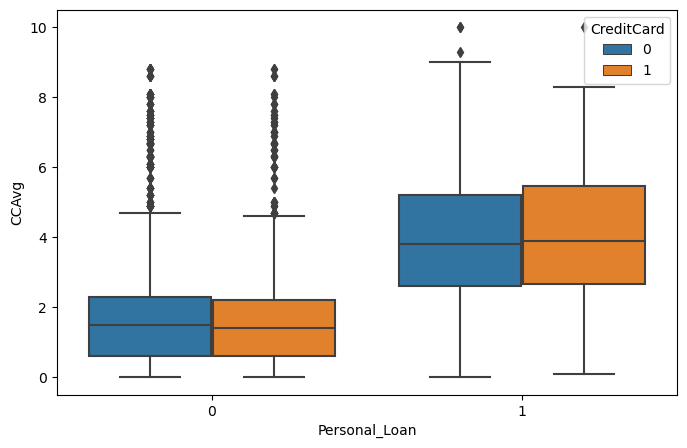

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(y="CCAvg", x="Personal_Loan", data=loan, hue='CreditCard')
plt.show()

- Customers that took personal loan and has credit card have the highest average spending on credit card per month

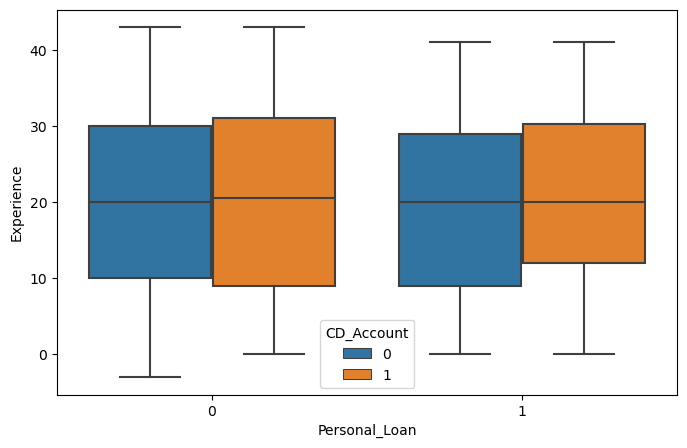

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(y="Experience", x="Personal_Loan", data=loan, hue='CD_Account')
plt.show()

- Customers with the highest experience did not take loan but have the highest number of certificate of deposit
- Customers that took loan and have experience have the highest number of certificate of deposit

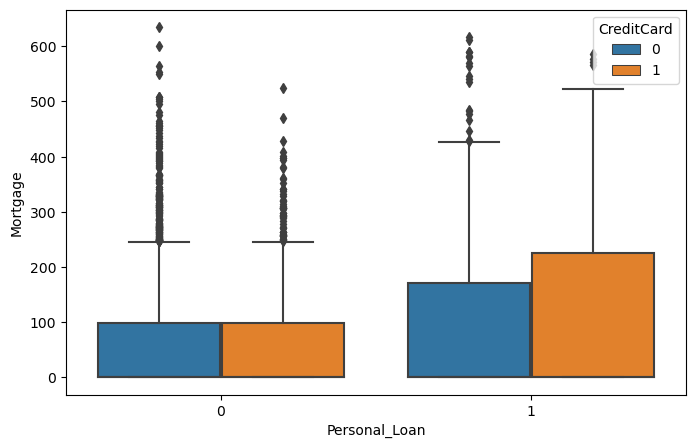

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(y="Mortgage", x="Personal_Loan", data=loan, hue='CreditCard')
plt.show()

- Customers that have mortgage and credit card took more loans.

### Detecting the Outliers

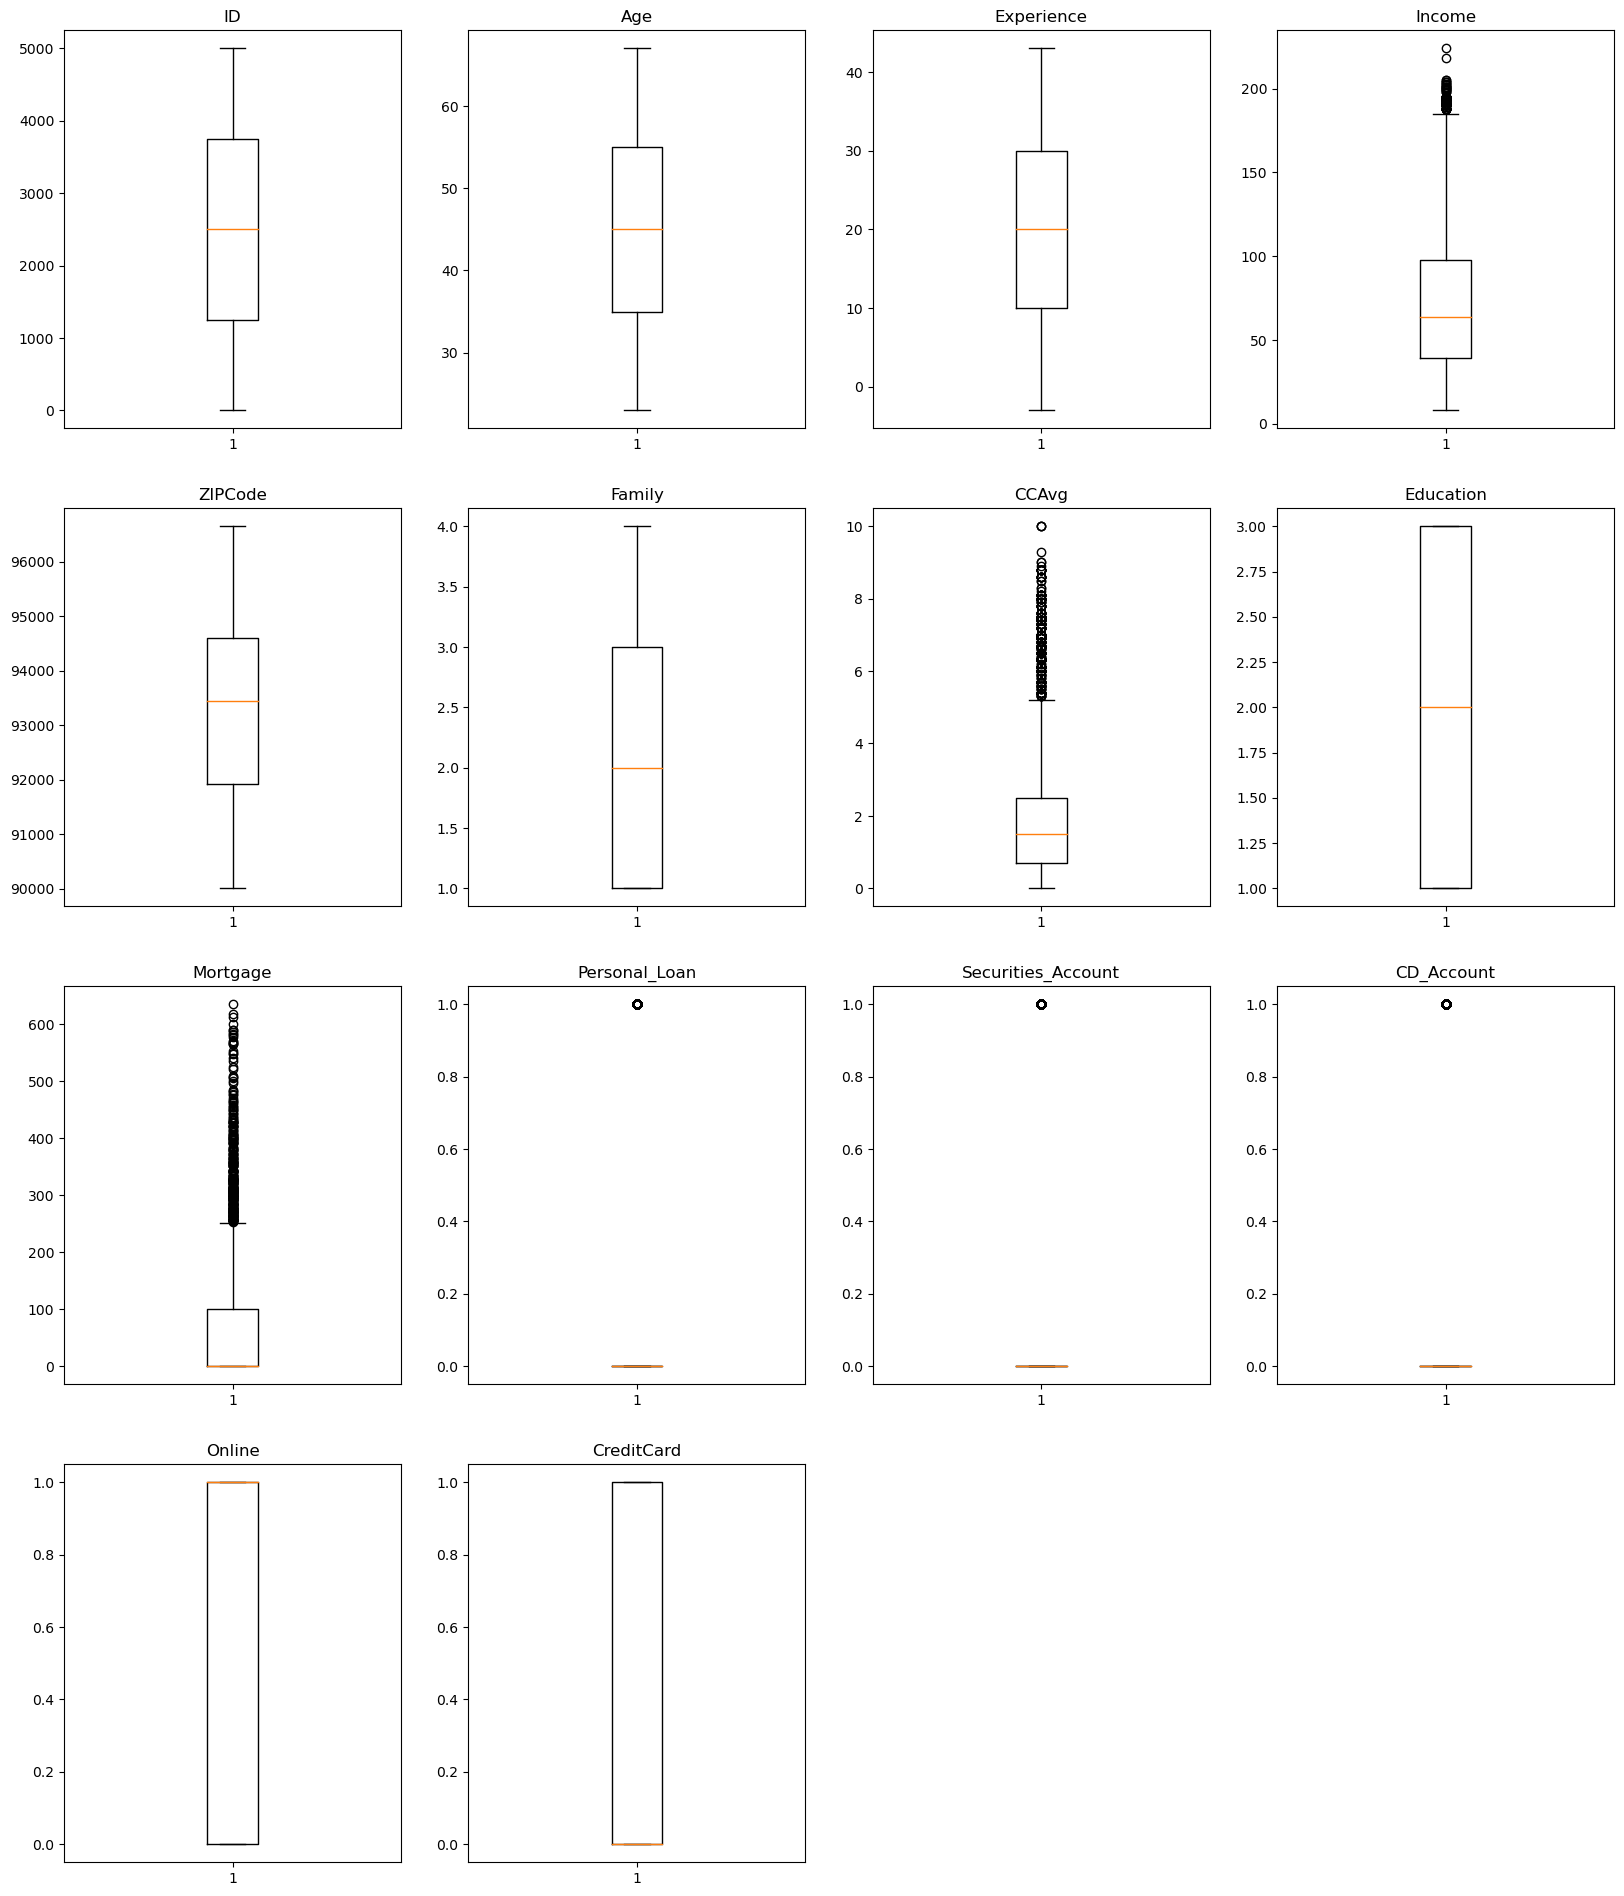

In [28]:
# outlier detection using boxplot
numeric_columns = loan.select_dtypes(include=np.number)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan[variable])
#     plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show()

- Plots above show that some variables have outliers, the affected variables will be addressed seperately because some discrete variable will be seen as outliers and will affect our model.
- The affected variables to be treated are Income, CCAvg and Mortgage.


### Resolving Outliers

In [29]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [30]:
loan_col =loan[['Income', 'CCAvg', 'Mortgage']]
loan_col

,Income,CCAvg,Mortgage
0,49,1.6,0
1,34,1.5,0
2,11,1.0,0
3,100,2.7,0
4,45,1.0,0
...,...,...,...
4995,40,1.9,0
4996,15,0.4,85
4997,24,0.3,0
4998,49,0.5,0


In [31]:
loan = treat_outliers_all(loan, loan_col)

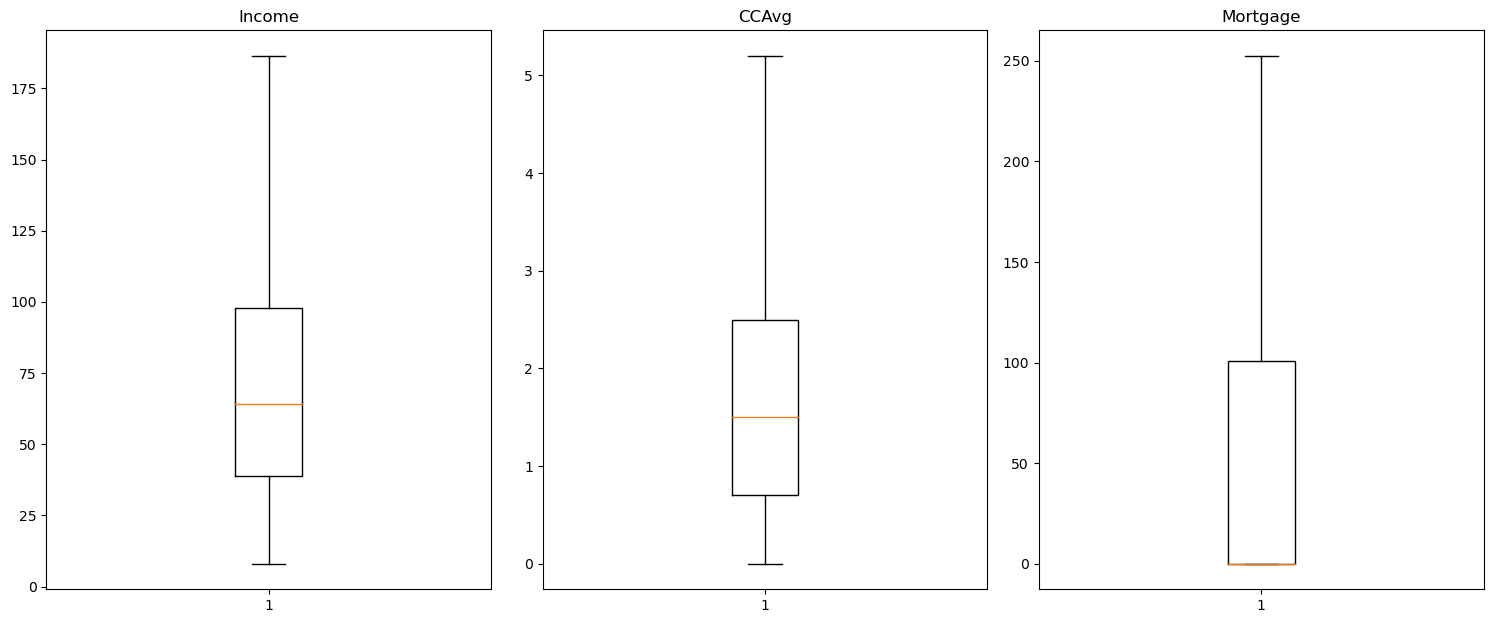

In [32]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(loan_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(loan[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [33]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.617400,45.626122,8.0,39.00,64.0,98.00,186.5
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.831338,1.452215,0.0,0.70,1.5,2.50,5.2
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,50.494700,83.005401,0.0,0.00,0.0,101.00,252.5
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### After treating the outliers, it was observed as follows;
- The highest earner, changes from 224 to 186.5
- The maximum values for mortgage changes from 635 to 252.5 
- The maximum values for CCAvg changes from 10 to 5.2

In [34]:
x=loan.drop('Personal_Loan', axis=1)
y=loan['Personal_Loan']
x

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0.0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0.0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0.0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0.0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1,1.9,3,0.0,0,0,1,0
4996,4997,30,4,15.0,92037,4,0.4,1,85.0,0,0,1,0
4997,4998,63,39,24.0,93023,2,0.3,3,0.0,0,0,0,0
4998,4999,65,40,49.0,90034,3,0.5,2,0.0,0,0,1,0


In [35]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)
# stratify is used because of imbalance data

In [36]:
# Checking the class distribution
y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- It is observed that the '0' class has 90.4% of the data set while the '1' class has 9.6% of the data set
- It can be concluded that we have an imbalance data

In [37]:
# Scalling the data
scaler= MinMaxScaler()
x_train_sd=scaler.fit_transform(x_train)
x_test_sd= scaler.transform(x_test)

In [38]:
# Building the model
logreg=LogisticRegression()
logreg.fit(x_train_sd, y_train)

LogisticRegression()

In [39]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

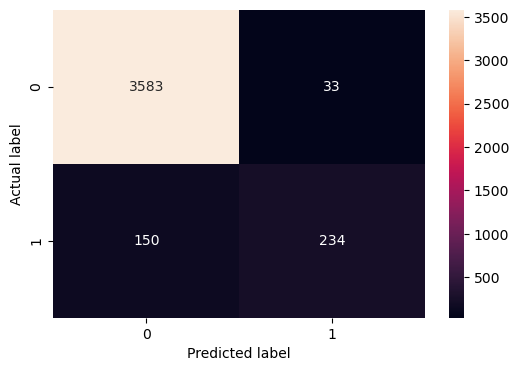

,Accuracy,Recall,Precision,F1-score
0,0.95425,0.609375,0.876404,0.718894


In [40]:
model_performance_classification(logreg, x_train_sd, y_train)

- I will be focusing on the recall score more and work on improving on it due to the goal of the organization.
- From the above 60.9% of the customers were the actual customers that took the loan.
- The model predicted that 150 customers will not take a loan whereas they would have taken the loan if they were offered.
- For the precision score, 87.6% of the customer were predicted currently, it implies that out of 267 customers that were predicted that will take a loan, 33 out of them did not take the loan.

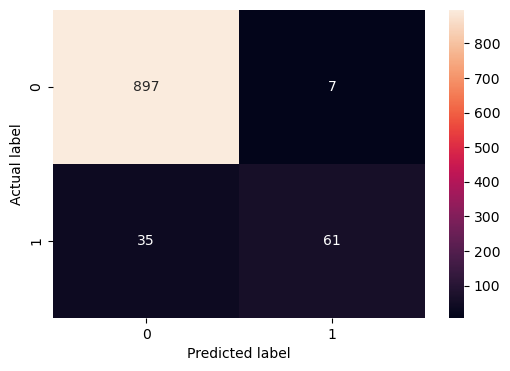

,Accuracy,Recall,Precision,F1-score
0,0.958,0.635417,0.897059,0.743902


In [41]:
model_performance_classification(logreg, x_test_sd, y_test)

- The model generalizes well (the performance on the test data improves over the train data) eventhough the performance on the recall is not so great 35 customers out of 96 customers were wrongly predicted.
- Further model will be built to improve on the recall scores.

In [42]:
# Building a model considering the imbalance data, we shall give more weight to the '1' class
logreg1=LogisticRegression(C=0.5, class_weight={0:0.3, 1:0.7})
logreg1.fit(x_train_sd, y_train)

LogisticRegression(C=0.5, class_weight={0: 0.3, 1: 0.7})

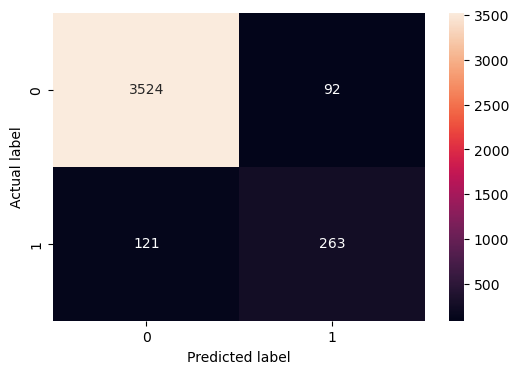

,Accuracy,Recall,Precision,F1-score
0,0.94675,0.684896,0.740845,0.711773


In [43]:
model_performance_classification(logreg1, x_train_sd, y_train)

- The recall score metrics improve when the '1' class was given the highest weight
- The recall improves from 60.9% to 68.5% though there was a deep in the precision score but the goal is to improve on the recall score.

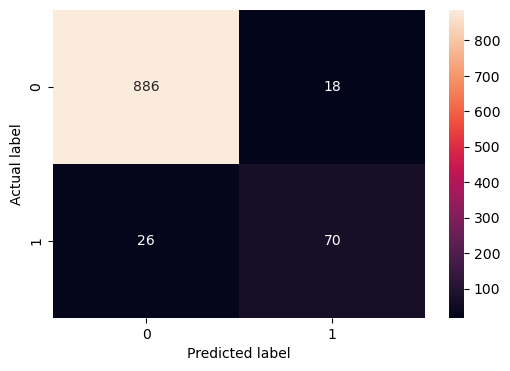

,Accuracy,Recall,Precision,F1-score
0,0.956,0.729167,0.795455,0.76087


In [44]:
model_performance_classification(logreg1, x_test_sd, y_test)

- On the test data there is an improvement from 63.5% to 72.91 for recall score but there is a deep on the precision score.
- The accuracy is still high

## AUC SCORE

In [45]:
# To treat AUC we need to predict probability as against predicting the class.
prob_train= logreg.predict_proba(x_train_sd)[:,1]
prob_train

array([0.05346261, 0.5788755 , 0.30914363, ..., 0.0027791 , 0.00247892,
       0.03428575])

In [46]:
auc_train= roc_auc_score(y_train, prob_train)
auc_train

0.9622734317385693

- The area at which the model distinguish between the False positive rate and the True positive rate

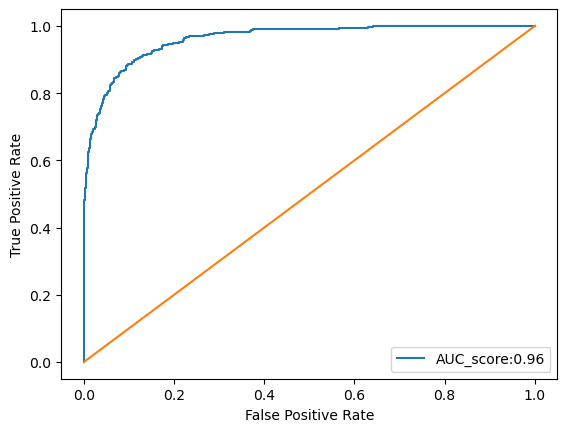

In [47]:
fpr, tpr, thresholds = roc_curve(y_train, prob_train)
plt.plot(fpr,tpr, label= f'AUC_score:{auc_train:.2f}');
plt.plot([0,1],[0,1]);
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='best')
plt.show()

- The AUC score indicated how well the model distinguishes between the two classes correctly
- THe AUC score for this model is 96%, this indicated that the model is good.

In [48]:
# To get te threshold at which the model will perform optimally on the recall score
opt_ind = np.argmax(tpr-fpr)
opt_ind
opt_thresh= thresholds[opt_ind]
opt_thresh

0.10591229233024729

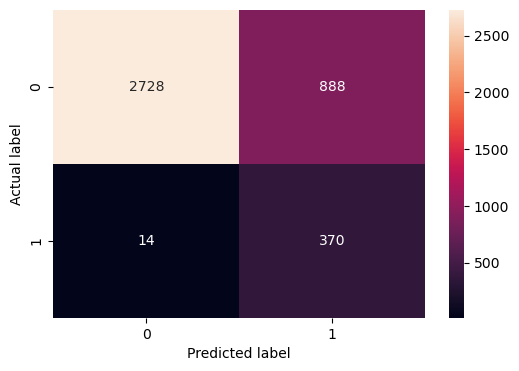

,Accuracy,Recall,Precision,F1-score
0,0.7745,0.963542,0.294118,0.45067


In [49]:
model_performance_classification(logreg1, x_train_sd, y_train,threshold=opt_thresh)

- The performance on the recall score improves drastically on the train data to 96.4 from 63.5 when the best threshold was used

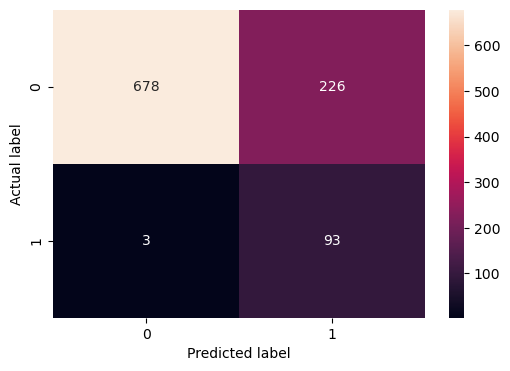

,Accuracy,Recall,Precision,F1-score
0,0.771,0.96875,0.291536,0.448193


In [50]:
model_performance_classification(logreg1, x_test_sd, y_test,threshold=opt_thresh)

- The performance on the recall score improves drastically on the train data to 96.9 from 72.9 when the best threshold was used
- There is huge fall in the precision score

In [51]:
precision_recall_curve(y_train, prob_train)

(array([0.096     , 0.09602401, 0.09604802, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 1.        , 1.        , ..., 0.00520833, 0.00260417,
        0.        ]),
 array([2.94290155e-05, 3.67052291e-05, 3.83111661e-05, ...,
        9.97446968e-01, 9.98109738e-01, 9.98760370e-01]))

In [52]:
pre, rec, thresh = precision_recall_curve(y_train, prob_train)

thresh.shape

(4000,)

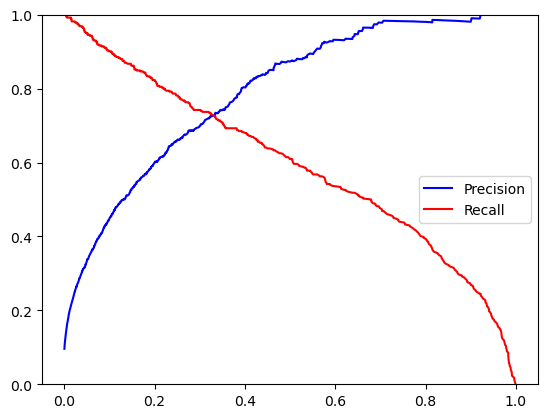

In [53]:
plt.plot(thresh, pre[:-1], "b", label ="Precision")
plt.plot(thresh, rec[:-1], "r", label ="Recall")
plt.ylim([0,1])
plt.legend(loc='best')
plt.show()

At 0.33 threshold, the precision and recall are the same, we will use this to build our model and see the performance of the model

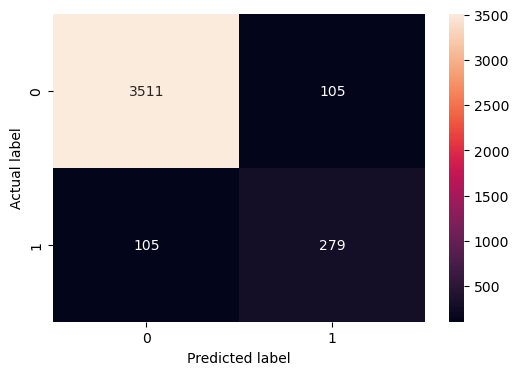

,Accuracy,Recall,Precision,F1-score
0,0.9475,0.726562,0.726562,0.726562


In [54]:
model_performance_classification(logreg, x_train_sd, y_train,threshold=0.33)

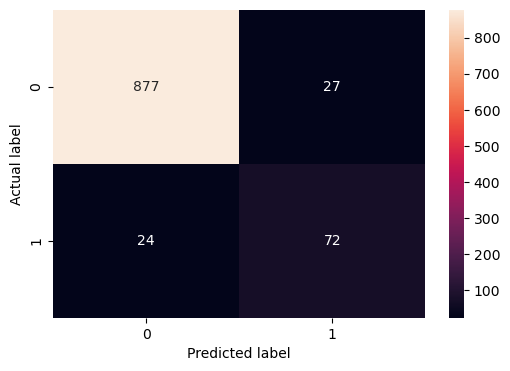

,Accuracy,Recall,Precision,F1-score
0,0.949,0.75,0.727273,0.738462


In [55]:
model_performance_classification(logreg, x_test_sd, y_test,threshold=0.33)

- The model that give the same values for recall and precision from the training data generalizes well when checked on the testing data, we can see improvement on all the metrics

## Using the Tree based model

### Another data will be copied from the main data

In [56]:
#import the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [57]:
loan_new= loan_m.copy()
loan_new

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [58]:
loan_new_col =loan_new[['Income', 'CCAvg', 'Mortgage']]
loan_new_col

,Income,CCAvg,Mortgage
0,49,1.6,0
1,34,1.5,0
2,11,1.0,0
3,100,2.7,0
4,45,1.0,0
...,...,...,...
4995,40,1.9,0
4996,15,0.4,85
4997,24,0.3,0
4998,49,0.5,0


Treatment of the outliers

In [59]:
loan_new = treat_outliers_all(loan_new, loan_new_col)
plt.figure(figsize=(20, 30))
loan_new.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.617400,45.626122,8.0,39.00,64.0,98.00,186.5
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.831338,1.452215,0.0,0.70,1.5,2.50,5.2
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,50.494700,83.005401,0.0,0.00,0.0,101.00,252.5
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<Figure size 2000x3000 with 0 Axes>

In [60]:
#select the x and y variables
x=loan_new.drop('Personal_Loan', axis=1)
y=loan_new['Personal_Loan']

In [61]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0, stratify=y)
# stratify is used because of imbalance data

In [62]:
# Building model
dtc= DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

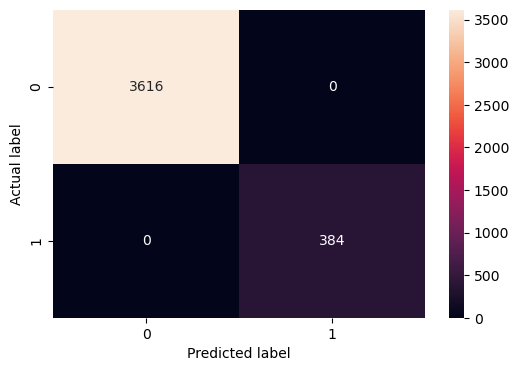

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [63]:
model_performance_classification(dtc, x_train, y_train)

- The model tends to produce a perfect leaf

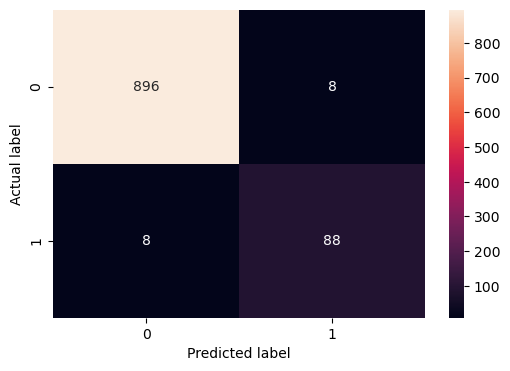

,Accuracy,Recall,Precision,F1-score
0,0.984,0.916667,0.916667,0.916667


In [64]:
model_performance_classification(dtc, x_test, y_test)

- The model overfits

In [65]:
#Building the model considering class weight
dtc1= DecisionTreeClassifier(class_weight={0:0.3,1:0.7}, random_state=0)
dtc1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=0)

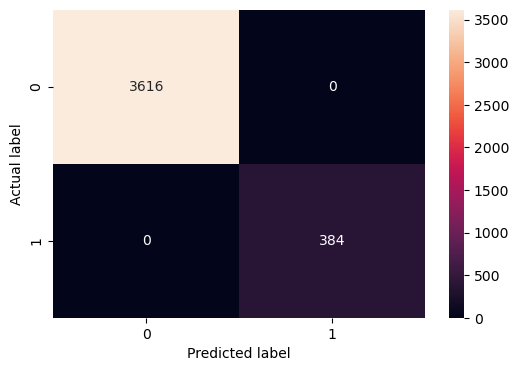

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [66]:
model_performance_classification(dtc1, x_train, y_train)

- The model will always work to produce a perfect leaf

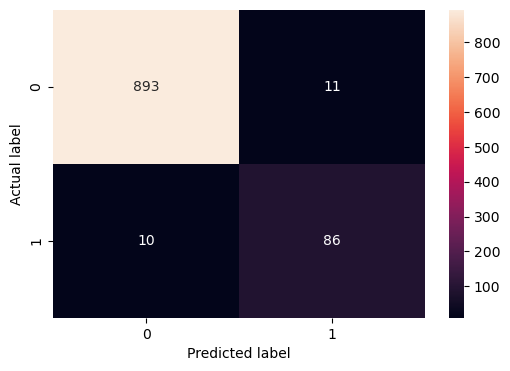

,Accuracy,Recall,Precision,F1-score
0,0.979,0.895833,0.886598,0.891192


In [67]:
model_performance_classification(dtc1, x_test, y_test)

- The model overfits

In [68]:
#Building the model considering the prepruning to enable the tree halt at a specified depth, we choose max_depth=5
dtc2= DecisionTreeClassifier(class_weight={0:0.3,1:0.7}, max_depth=5, random_state=0)
dtc2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       random_state=0)

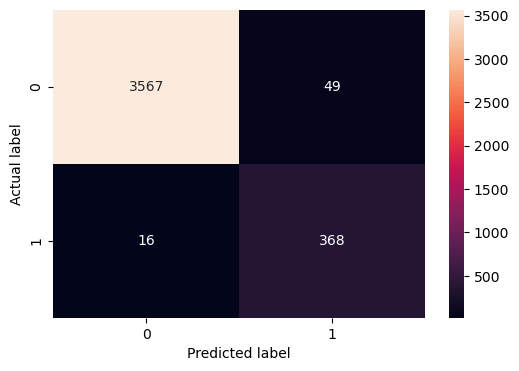

,Accuracy,Recall,Precision,F1-score
0,0.98375,0.958333,0.882494,0.918851


In [69]:
model_performance_classification(dtc2, x_train, y_train)

- The model predict 95.8% of the actual data correctly and also 88.24% was gotten correctly on the prediction
- only sixteen customers were wrongly predicted that they will not take loan whereas they would have taken loan if offered.

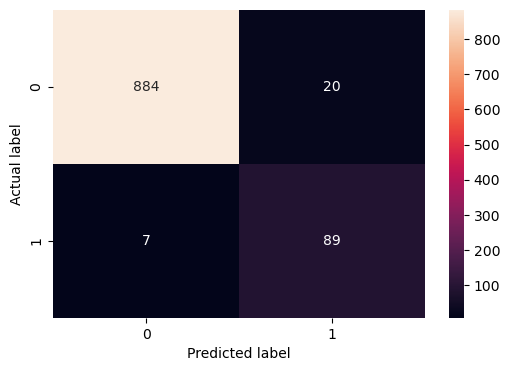

,Accuracy,Recall,Precision,F1-score
0,0.973,0.927083,0.816514,0.868293


In [70]:
model_performance_classification(dtc2, x_test, y_test)

- Though there are slight reduction in all the performance metrics, we can still conclude that the model generalizes well.
- Compared the performance of the test data when max_depth was not considered the recall score improved from 89.5% to 92.7%.
- only 7 customers were predicted wrongly that they wont take a loan whereas they would have taken the loan if offered.

In [71]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pydotplus
from IPython.display import Image
from sklearn import tree

In [74]:
# dot_data = tree.export_graphviz(dtc2, out_file = None, feature_names = x.columns,
#                                class_names=["0","1"], max_depth=5)

# # create a graph from the dot data
# graph = pydotplus.graph_from_dot_data(dot_data)

# # create the tree image from the graph
# Image(graph.create_png())
# dot_data

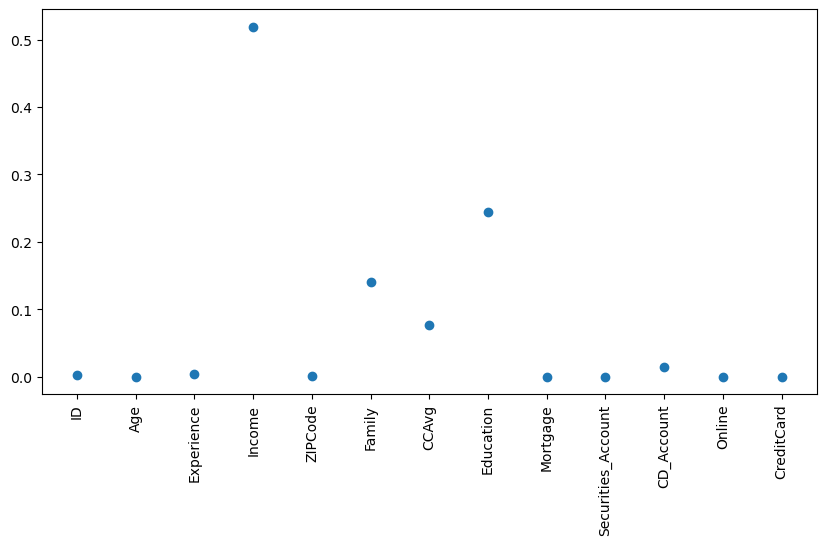

In [75]:
plt.figure(figsize= (10,5))
plt.plot(dtc2.feature_importances_, 'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
plt.show()

- With the above illustration, it implies that income is a determinant for loan acceptability and eligibilty by customer.
- Education, Average spending on credit card and family contributed to personal loan acceptability and eligibility.

In [76]:
pip install imblearn

The generation of synthetic data will be implore here to generate data that will help with the imbalance data. A model will be built with this and observation of the performnace of all the metrics will be considered

In [77]:
#Import library needed
from imblearn.over_sampling import SMOTE

In [78]:
smote= SMOTE()

In [79]:
x_sm, y_sm= smote.fit_resample(x,y)

In [80]:
# checking the count of the two class in the dependent variable
y_sm.value_counts()

0    4520
1    4520
Name: Personal_Loan, dtype: int64

In [81]:
# Splitting the Smote data
x_sm_train, x_sm_test, y_sm_train, y_sm_test = train_test_split(x_sm,y_sm, test_size=0.2, random_state=0)

In [82]:
#importing libraries needed
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [83]:
rfc = RandomForestClassifier(max_depth=5, random_state=0)

In [84]:
# Built the model on the actual data
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

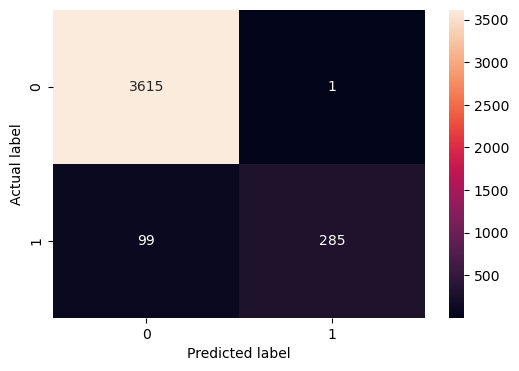

,Accuracy,Recall,Precision,F1-score
0,0.975,0.742188,0.996503,0.850746


In [85]:
# Checking the performance of the metrics on the actaul data on the training data
model_performance_classification(rfc, x_train, y_train)

- Using Random Forest Classifier, 99 out of 384 customers were wrongly predicted that they wont take a loan.

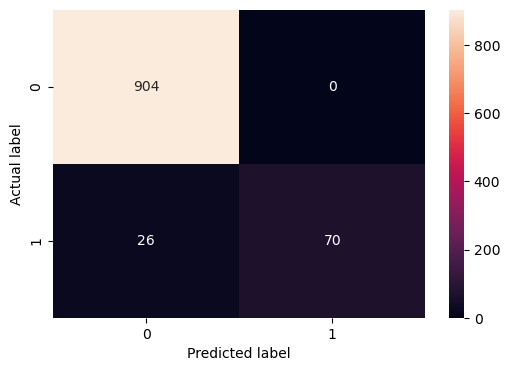

,Accuracy,Recall,Precision,F1-score
0,0.974,0.729167,1.0,0.843373


In [86]:
# Checking the performance of the metrics on the actaul data on the testing data
model_performance_classification(rfc, x_test, y_test)

- Though there are slight reduction in the metrics asides the Precision Score, the model still generalises well. 
- The model wont be considered due to less performance on the recall score which we considering for this project.

In [87]:
## Built the model on the regenerated data
rfc_sm = RandomForestClassifier(max_depth=5, random_state=0)
rfc_sm.fit(x_sm_train, y_sm_train)

RandomForestClassifier(max_depth=5, random_state=0)

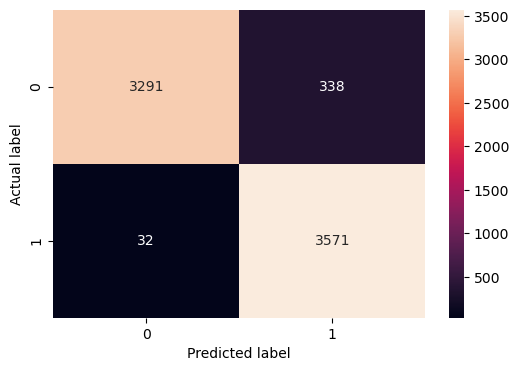

,Accuracy,Recall,Precision,F1-score
0,0.948838,0.991119,0.913533,0.950745


In [88]:
# Checking the performance of the metrics on the regenerated data on the training data
model_performance_classification(rfc_sm, x_sm_train, y_sm_train)

- The performance greatly improves when we balanced the data using SMOTE
- The highest recall score of 98.91% was obtained using this model when data was balanced.
- This model will be given consideration

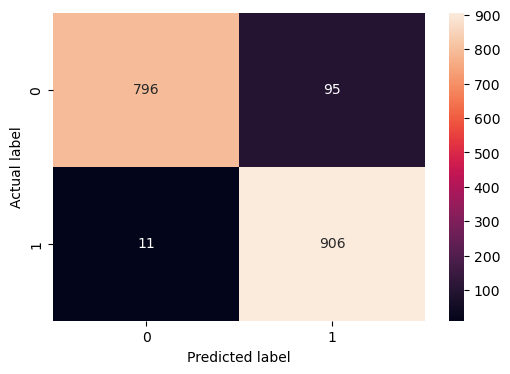

,Accuracy,Recall,Precision,F1-score
0,0.941372,0.988004,0.905095,0.944734


In [89]:
## Checking the performance of the metrics on the regenerated data on the testing data
model_performance_classification(rfc_sm, x_sm_test, y_sm_test)

- The model generalizes well on the test data

### I will adopt the stratified Kfold for cross validation

In [90]:
from sklearn.model_selection import cross_val_score, GridSearchCV
skfold = StratifiedKFold(n_splits = 6, shuffle=True, random_state = 0)
scores1 = cross_val_score(rfc, x_train, y_train, cv = skfold, scoring = "recall")
print("sKFold scores1: {}".format(scores1))

sKFold scores1: [0.6875   0.78125  0.78125  0.734375 0.734375 0.65625 ]


In [91]:
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6,7,8,9,10]}

In [92]:
grid = GridSearchCV(rfc, param_grid, cv = skfold, n_jobs = -1, scoring = "recall")
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(max_depth=5, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [93]:
grid.best_params_

{'max_depth': 10}

In [94]:
grid.best_score_

0.8723958333333334

- A model will be built to consider the parameter that gives the highest recall score and also check it on the test data

In [95]:
rfc5 = RandomForestClassifier(max_depth=10, random_state=0)
rfc5.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

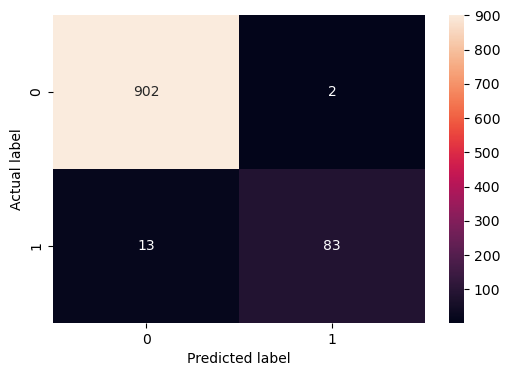

,Accuracy,Recall,Precision,F1-score
0,0.985,0.864583,0.976471,0.917127


In [96]:
model_performance_classification(rfc5, x_test, y_test)

- The model generalizes well and also deduced that 13 out of 83 customers was predicted wrongly
- 86% was correctly predicted despite the imbalance data

In [97]:
skfold = StratifiedKFold(n_splits = 4, shuffle=True, random_state = 0)
scores1 = cross_val_score(rfc_sm, x_sm_train, y_sm_train, cv = skfold, scoring = "recall")
print("sKFold scores1: {}".format(scores1))

sKFold scores1: [0.98224195 0.98779134 0.99334073 0.98555556]


In [98]:
grid = GridSearchCV(rfc_sm, param_grid, cv = skfold, n_jobs = -1, scoring = "recall")
grid.fit(x_sm_train, y_sm_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(max_depth=5, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [99]:
grid.best_params_

{'max_depth': 6}

In [100]:
grid.best_score_

0.9883425823159453

In [101]:
rfc_sm1 = RandomForestClassifier(max_depth=9, random_state=0)
rfc_sm1.fit(x_sm_train, y_sm_train)

RandomForestClassifier(max_depth=9, random_state=0)

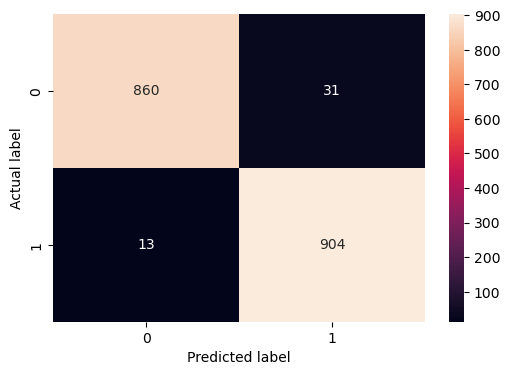

,Accuracy,Recall,Precision,F1-score
0,0.975664,0.985823,0.966845,0.976242


In [102]:
model_performance_classification(rfc_sm1, x_sm_test, y_sm_test)

- After addressing the imbalance that using SMOTE, the recall score is 98.9%, we only have 10 customer wrongly predicted by the model out of 917

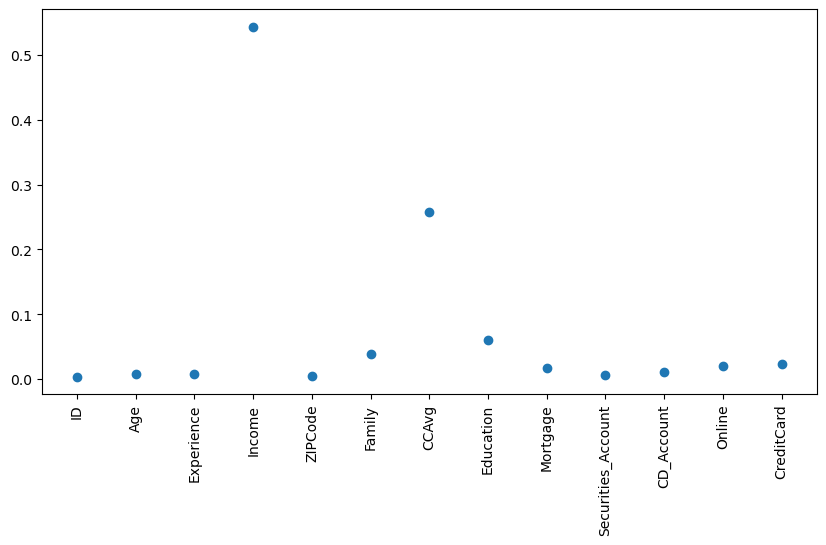

In [103]:
plt.figure(figsize= (10,5))
plt.plot(rfc_sm.feature_importances_, 'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
plt.show()

- It can be observed from the above that Income is the most important variable in the model. This implies that customers with high income has the highest probability of obtaining a Personal Loan
- The average spending on credit card also has importance on the model, this implies that customer with high CCAvg will obtain a personal loan when profiled.

In [104]:
gbc= GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

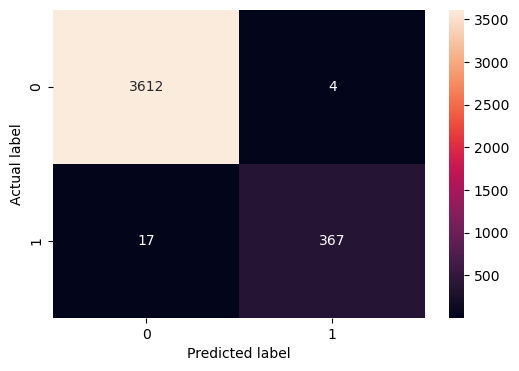

,Accuracy,Recall,Precision,F1-score
0,0.99475,0.955729,0.989218,0.972185


In [105]:
model_performance_classification(gbc, x_train, y_train)

- Using gradient boosting the model performs better on all metrics
- The metric we are focusing on have a 95.6% performance.

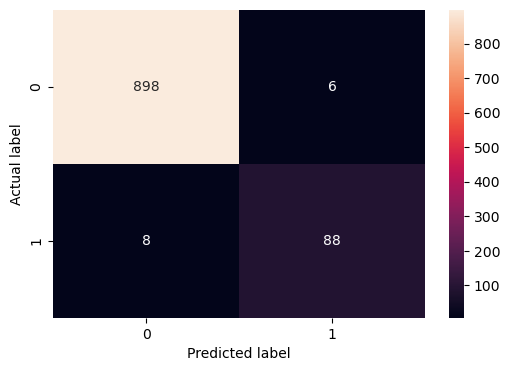

,Accuracy,Recall,Precision,F1-score
0,0.986,0.916667,0.93617,0.926316


In [106]:
model_performance_classification(gbc, x_test, y_test)

- The model generalizes well, 8 customers out of 96 was on the False Negative

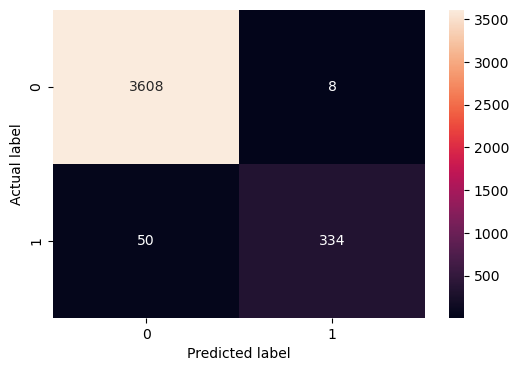

,Accuracy,Recall,Precision,F1-score
0,0.9855,0.869792,0.976608,0.92011


In [107]:
gbc4= GradientBoostingClassifier(random_state=0, learning_rate=0.05, max_depth=2 )
gbc4.fit(x_train, y_train)
model_performance_classification(gbc4, x_train, y_train)

- The performance of the model dropped on the recall when the learning rate and max_depth were tuned.

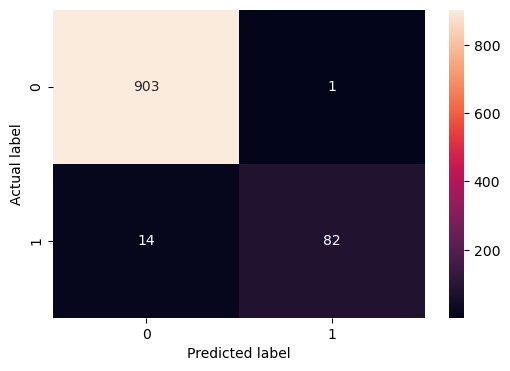

,Accuracy,Recall,Precision,F1-score
0,0.985,0.854167,0.987952,0.916201


In [108]:
model_performance_classification(gbc4, x_test, y_test)

- The performance on the record is not great but the model generalizes well

In [109]:
gbc1= GradientBoostingClassifier(random_state=0, learning_rate=0.05, max_depth=2 )
gbc1.fit(x_sm_train, y_sm_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, random_state=0)

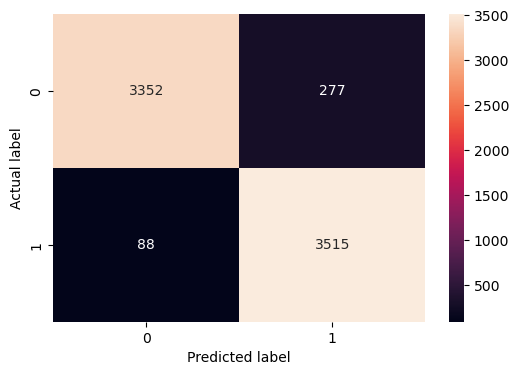

,Accuracy,Recall,Precision,F1-score
0,0.94953,0.975576,0.926951,0.950642


In [110]:
model_performance_classification(gbc1, x_sm_train, y_sm_train)

- the recall scores greatly improves on the balanced data when using the same learning rate and Max_depth
- out of 3603 customers that was predicted by the model, 87 customers were wrongly predicted.

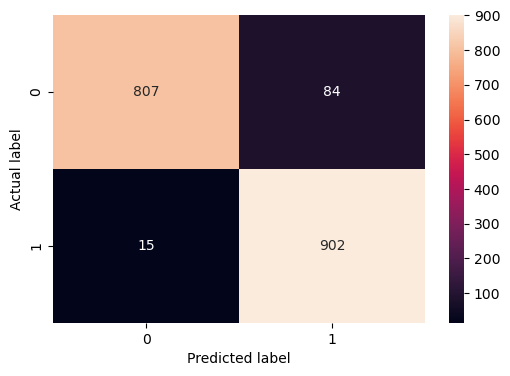

,Accuracy,Recall,Precision,F1-score
0,0.945243,0.983642,0.914807,0.947977


In [111]:
model_performance_classification(gbc1, x_sm_test, y_sm_test)

- the model generalizes well and the performance on the recall scores improves.

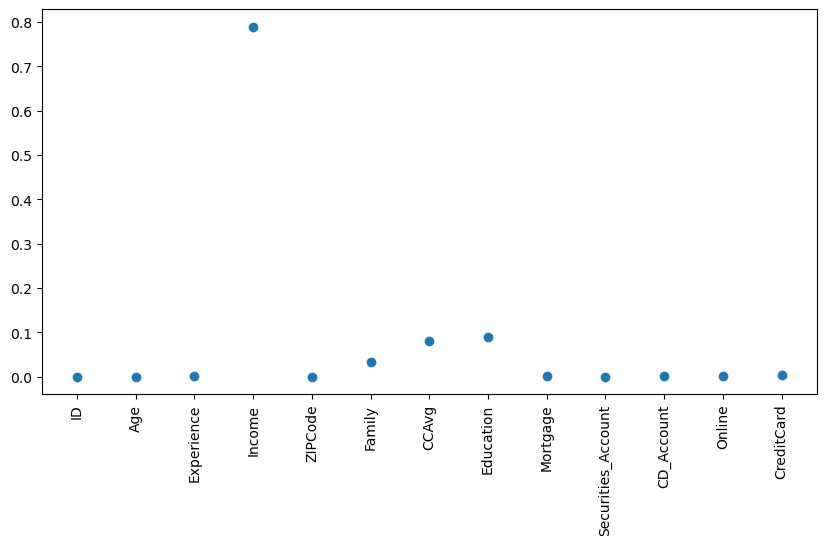

In [112]:
plt.figure(figsize= (10,5))
plt.plot(gbc1.feature_importances_, 'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
plt.show()

- Income is also the most important variable to this model.
- Education and CCAvg have some impact too

In [113]:
kfold = KFold(n_splits = 6, shuffle=True, random_state = 0)
scores = cross_val_score(gbc, x_train, y_train, cv = kfold, scoring = "recall")
print("KFold scores: {}".format(scores))

KFold scores: [0.83050847 0.859375   0.88709677 0.92       0.9137931  0.87878788]


In [114]:
np.mean(scores)

0.8815935385009958

In [115]:
skfold = StratifiedKFold(n_splits = 6, shuffle=True, random_state = 0)
scores1 = cross_val_score(gbc, x_train, y_train, cv = skfold, scoring = "recall")
print("sKFold scores1: {}".format(scores1))

sKFold scores1: [0.90625  0.921875 0.90625  0.921875 0.890625 0.90625 ]


In [116]:
np.mean(scores1)

0.9088541666666666

In [117]:
param_grid = {'learning_rate': [0.01, 0.1, 0.2,0.3,0.4, 0.5, 5],
             'max_depth': [1, 2, 3, 4, 5, 6,7,8,9,10]}

In [118]:
gbc.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [119]:
grid = GridSearchCV(gbc, param_grid, cv = skfold, n_jobs = -1, scoring = "recall")
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 5],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [120]:
grid.best_params_

{'learning_rate': 0.5, 'max_depth': 5}

In [121]:
grid.best_score_

0.9166666666666666

In [122]:
gbc2= GradientBoostingClassifier(random_state=0, learning_rate=0.5, max_depth=5)
gbc2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, random_state=0)

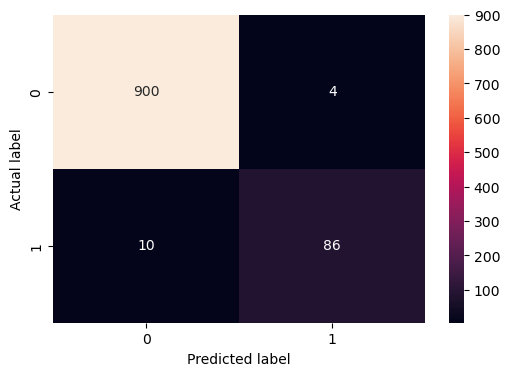

,Accuracy,Recall,Precision,F1-score
0,0.986,0.895833,0.955556,0.924731


In [123]:
model_performance_classification(gbc2, x_test, y_test)

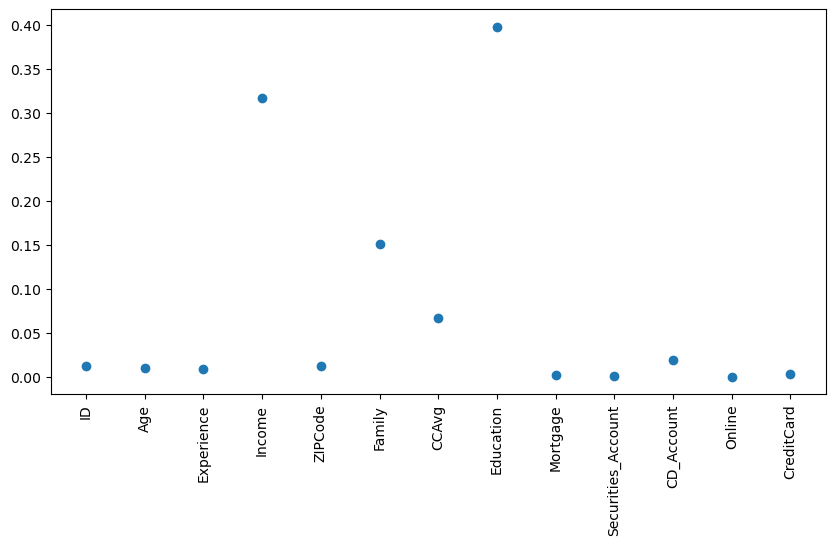

In [124]:
plt.figure(figsize= (10,5))
plt.plot(gbc2.feature_importances_, 'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
plt.show()

- With this model education is the parameter with the highest importance to the target
- Income, Family and CCAvg are also importance to the target

In [125]:
skfold2 = StratifiedKFold(n_splits = 6, shuffle=True, random_state = 0)
scores2= cross_val_score(gbc1, x_sm_train, y_sm_train, cv = skfold, scoring = "recall")
print("sKFold scores2: {}".format(scores2))
np.mean(scores2)

sKFold scores2: [0.97836938 0.97171381 0.96173045 0.98166667 0.97833333 0.97833333]


0.9750244962100204

In [126]:
grid2 = GridSearchCV(gbc1, param_grid, cv = skfold2, n_jobs = -1, scoring = "recall")
grid2.fit(x_sm_train, y_sm_train)

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 5],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='recall')

In [127]:
grid2.best_params_

{'learning_rate': 0.01, 'max_depth': 2}

In [128]:
grid2.best_score_

0.9913976705490849

In [129]:
gbc3= GradientBoostingClassifier(random_state=0, learning_rate=0.01, max_depth=2)
gbc3.fit(x_sm_train, y_sm_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, random_state=0)

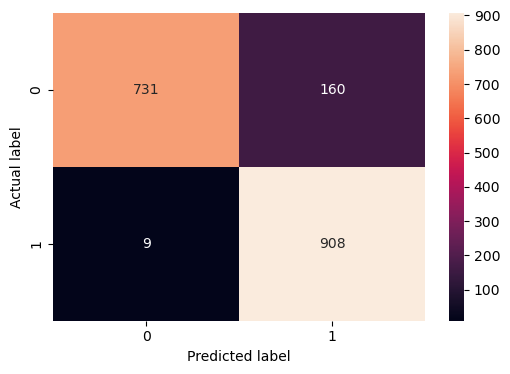

,Accuracy,Recall,Precision,F1-score
0,0.906527,0.990185,0.850187,0.914861


In [130]:
model_performance_classification(gbc3, x_sm_test, y_sm_test)

- The highest recall score obtained, we have only six customers that are wrongly predicted not to qualify for a loan

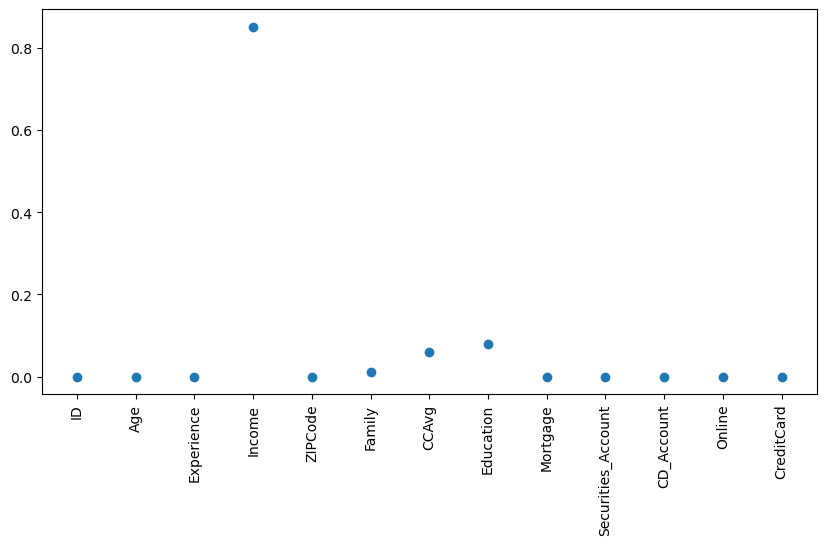

In [131]:
plt.figure(figsize= (10,5))
plt.plot(gbc3.feature_importances_, 'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
plt.show()

- Income is the most important partameter to this model
- CCAvg and Education are also having impact to the target.

01## Observation
- Resolving the imbalance data led to improvements across the board for the model.
- The use of hyperparameter tuning aids in determining the necessary parameters and always improves the test data..
- When using the default parameters with imbalance data, the Gradient Boosting Classifier performs well with a recall score of 91.87%.
- The Gradient Boosting Classifier's improved recall score is 97.5% when the imbalance data is processed using SMOTE.
- With hyperparameter tuning of the balanced data, the performance of the recall score improves to 99.01% on the test data.
- The Gradeint Boosting Classifier model, which has a learning rate of 0.01 and a maximum depth of 2, will be used. Its recall score is 99.3%.
- Income has proven to be the factor that the target has given the most consideration in all the models used.
- CCAvg, family and education also have impact on the target.
- Income CCAvg, family and education also have positive correlation with the target variable.

## Recommendation
- When determining a customer's loan eligibility, attention should be paid to those with greater incomes.
- Customers with high incomes should be the organization's primary target market(prospect).
- More encouragement should be given to credit card holders to use their cards.
- The bank should make sure to bank each member of the existing customer's family.
- Launching a rewards programme to promote credit card use is a good idea.
- Customers with the highest income levels can be drawn to the bank through a referral programme campaign from existing customers with higher incomes.